In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# import data
dt = pd.read_csv("C:\\Users\\Simran Shaikh\\OneDrive\\Desktop\\P-105\\Website Vistiors Daywise - Sheet1.csv")
dt

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870
...,...,...
168,18-03-2022,2494
169,19-03-2022,2976
170,20-03-2022,2534
171,21-03-2022,3641


# Step 1: Exploratory Data Analysis(EDA)

In [3]:
# import data
data= pd.read_csv("C:\\Users\\Simran Shaikh\\OneDrive\\Desktop\\P-105\\Website Vistiors Daywise - Sheet1.csv", parse_dates=True, index_col="Date")
data

,Daily Visitors
Date,
2021-01-10,2649
2021-02-10,2000
2021-03-10,2011
2021-04-10,3219
2021-05-10,3870
...,...
2022-03-18,2494
2022-03-19,2976
2022-03-20,2534


In [4]:
data.head(5)

,Daily Visitors
Date,
2021-01-10,2649
2021-02-10,2000
2021-03-10,2011
2021-04-10,3219
2021-05-10,3870


In [5]:
data.tail()

,Daily Visitors
Date,
2022-03-18,2494
2022-03-19,2976
2022-03-20,2534
2022-03-21,3641
2022-03-22,4031


In [6]:
data.isna().sum()

Daily Visitors    0
dtype: int64

In [7]:
data.shape

(173, 1)

In [8]:
data.index

DatetimeIndex(['2021-01-10', '2021-02-10', '2021-03-10', '2021-04-10',
               '2021-05-10', '2021-06-10', '2021-07-10', '2021-08-10',
               '2021-09-10', '2021-10-10',
               ...
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22'],
              dtype='datetime64[ns]', name='Date', length=173, freq=None)

In [9]:
data.describe()

,Daily Visitors
count,173.000000
mean,2829.907514
std,765.194741
min,1245.000000
25%,2336.000000
50%,2751.000000
75%,3207.000000
max,7165.000000


In [10]:
#printing date of max and min customer visited  
print(data.loc[data["Daily Visitors"]==data["Daily Visitors"].max()])
print(data.loc[data["Daily Visitors"]==data["Daily Visitors"].min()])

            Daily Visitors
Date                      
2022-02-28            7165
            Daily Visitors
Date                      
2021-04-11            1245


# Step 2: Visualixation Of Data

<AxesSubplot:xlabel='Date'>

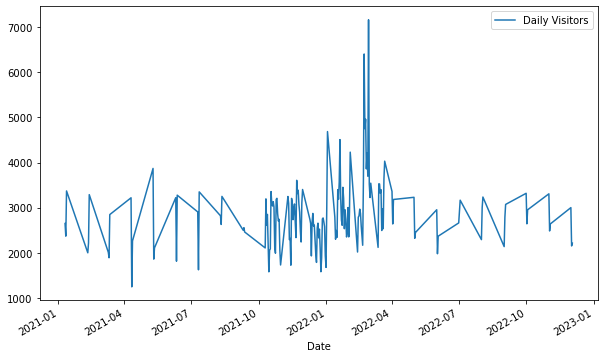

In [11]:
#plotting 
data.plot()

<AxesSubplot:xlabel='Date'>

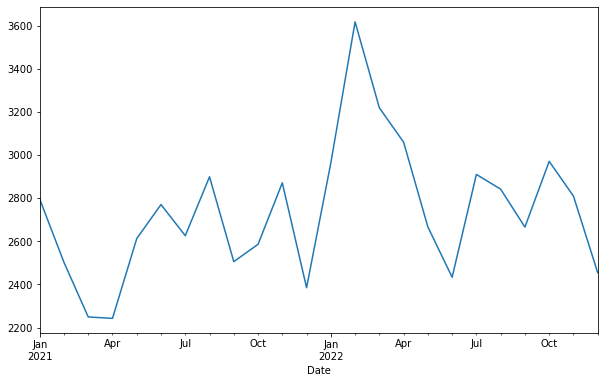

In [12]:
data['Daily Visitors'].resample("M").mean().plot()   #resampling data Month wise

<AxesSubplot:xlabel='Date'>

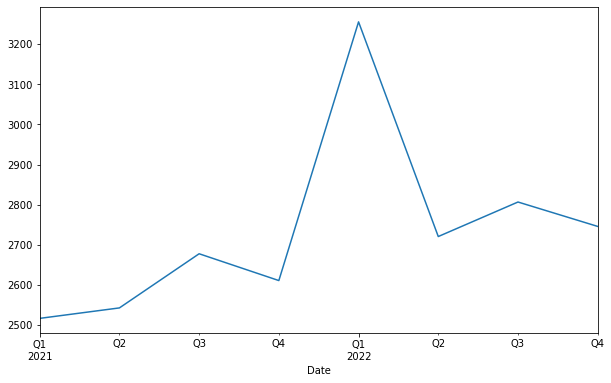

In [13]:
data['Daily Visitors'].resample("Q").mean().plot()  #resampling data Quarter wise

<AxesSubplot:xlabel='Date'>

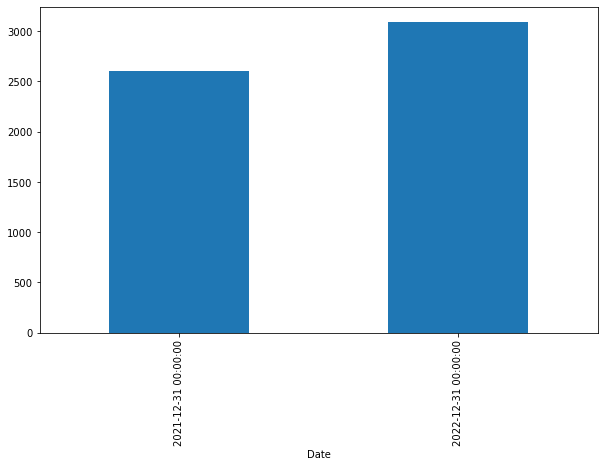

In [14]:
data['Daily Visitors'].resample("y").mean().plot(kind='bar')

array([[<AxesSubplot:title={'center':'Daily Visitors'}>]], dtype=object)

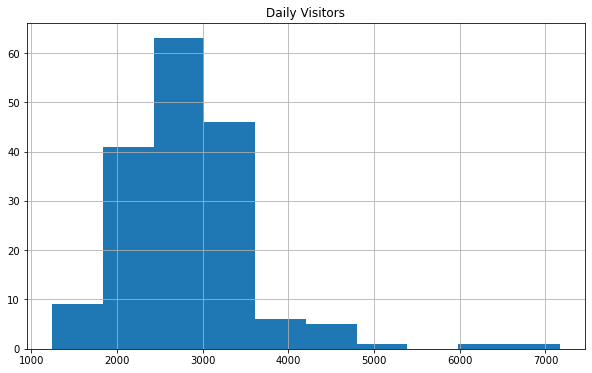

In [15]:
data.hist()

<AxesSubplot:ylabel='Density'>

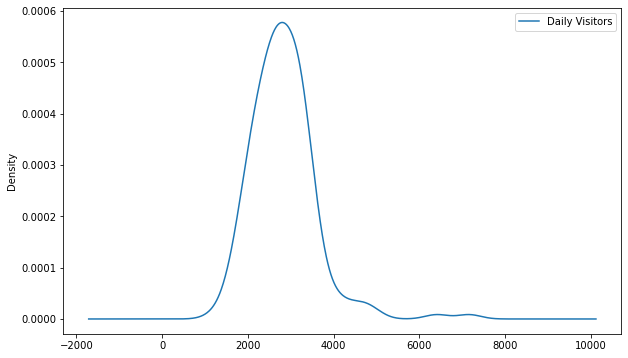

In [16]:
data.plot(kind="kde")

<AxesSubplot:xlabel='Daily Visitors'>

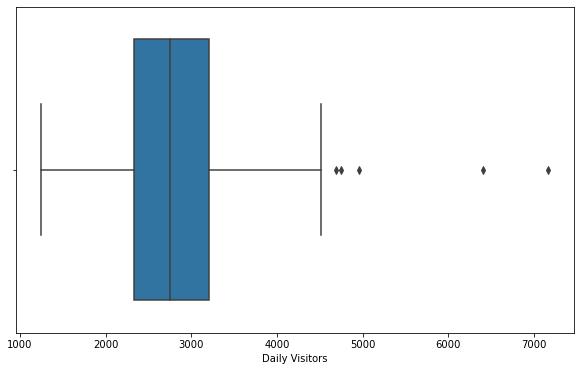

In [17]:
import seaborn as sns
sns.boxplot(x= data['Daily Visitors'])

In [18]:
#Determine rolling statistics---->moving average smoothing is used to remove the noise

rolmean=data['Daily Visitors'].rolling(window=12).mean() #window size 12 denotes 12 raw observations useed to calculate the moving average

rolstd=data['Daily Visitors'].rolling(window=12).std()

print(rolmean,rolstd)

Date
2021-01-10            NaN
2021-02-10            NaN
2021-03-10            NaN
2021-04-10            NaN
2021-05-10            NaN
                 ...     
2022-03-18    2972.166667
2022-03-19    2956.333333
2022-03-20    2897.833333
2022-03-21    2945.250000
2022-03-22    3035.083333
Name: Daily Visitors, Length: 173, dtype: float64 Date
2021-01-10           NaN
2021-02-10           NaN
2021-03-10           NaN
2021-04-10           NaN
2021-05-10           NaN
                 ...    
2022-03-18    493.540610
2022-03-19    489.790370
2022-03-20    495.243344
2022-03-21    538.761901
2022-03-22    623.396920
Name: Daily Visitors, Length: 173, dtype: float64


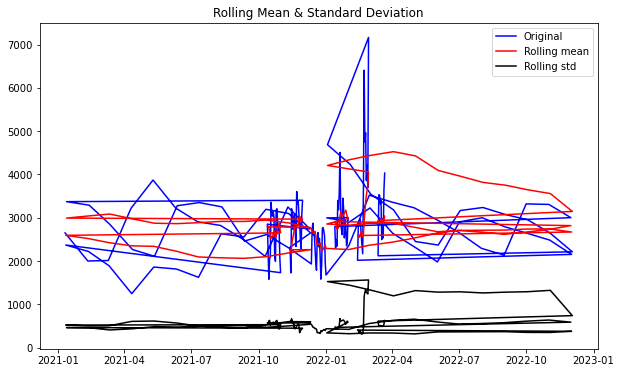

In [19]:
#plot rolling statistics
orig=plt.plot(data['Daily Visitors'],color="blue",label="Original")
mean=plt.plot(rolmean,color="red",label="Rolling mean")
std=plt.plot(rolstd,color="black",label="Rolling std")
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)

In [20]:
#mean and standard deviation are not constant it means it has some seasonality

In [21]:
#H0:data is not stationary
#H1:data is stationary
#To check wheather a time series is stationary or not we use dickey-fuller test
#Perform Augmented Dickey–Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(data['Daily Visitors'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -2.358587
p-value                          0.153768
#Lags Used                      14.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


Here p value is greater than 0.05 ,we fail to reject the null hypothesis that means time series not stationary.

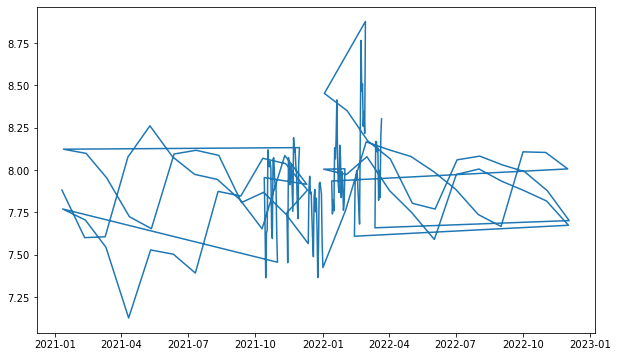

In [22]:
#using log transorfamation
data_logScale = np.log(data)
plt.plot(data_logScale)

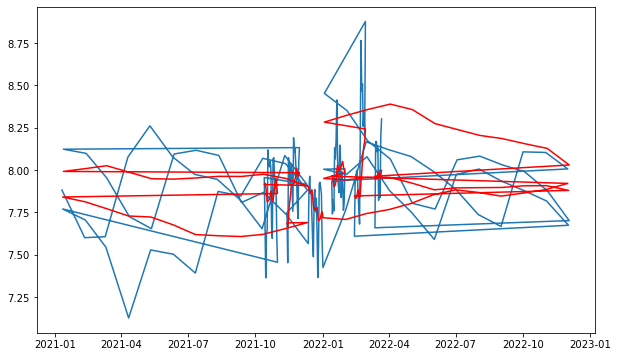

In [23]:
#The below transformation is required to make series stationary
movingAverage = data_logScale.rolling(window=12).mean()
movingSTD = data_logScale.rolling(window=12).std()
plt.plot(data_logScale)
plt.plot(movingAverage, color='red')

In [24]:
datasetLogScaleMinusMovingAverage = data_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,Daily Visitors
Date,
2021-12-10,0.007109
2021-10-13,0.040697
2021-10-14,-0.231891
2021-10-15,-0.538057
2021-10-16,-0.235203
2021-10-17,-0.169749
2021-10-18,0.302151
2021-10-19,0.210591
2021-10-20,0.191335


In [25]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Daily Visitors'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

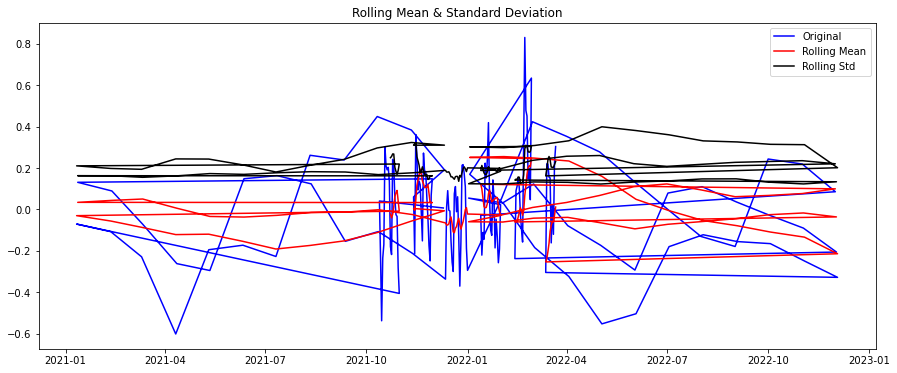

Results of Dickey Fuller Test:
Test Statistic                  -3.691069
p-value                          0.004241
Lags Used                       14.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


In [26]:
plt.figure(figsize=(15,6))
test_stationarity(datasetLogScaleMinusMovingAverage)

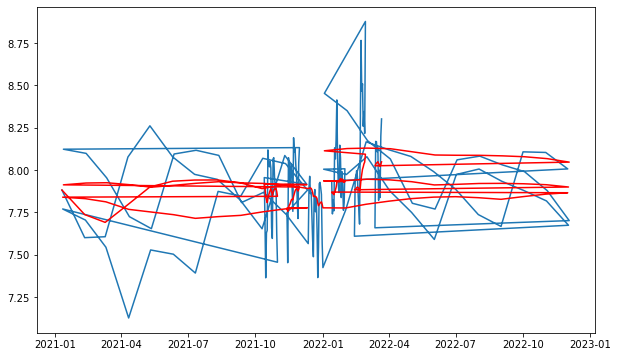

In [27]:
exponentialDecayWeightedAverage = data_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

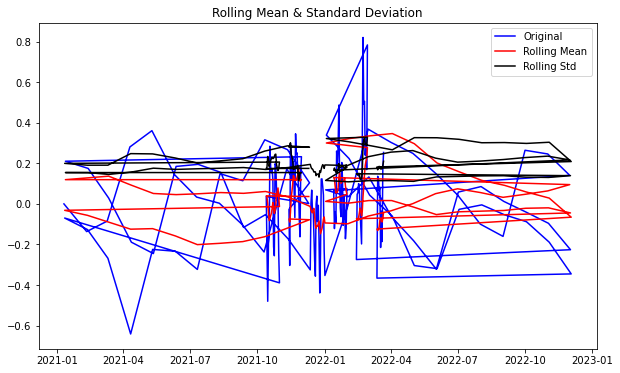

Results of Dickey Fuller Test:
Test Statistic                  -3.718777
p-value                          0.003857
Lags Used                       14.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


In [28]:
datasetLogScaleMinusExponentialMovingAverage = data_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

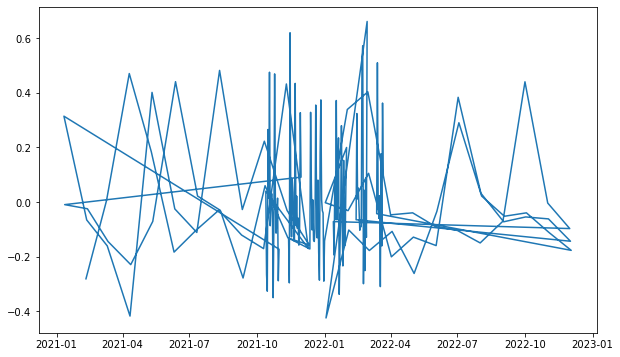

In [29]:
datasetLogDiffShifting = data_logScale - data_logScale.shift()
plt.plot(datasetLogDiffShifting)

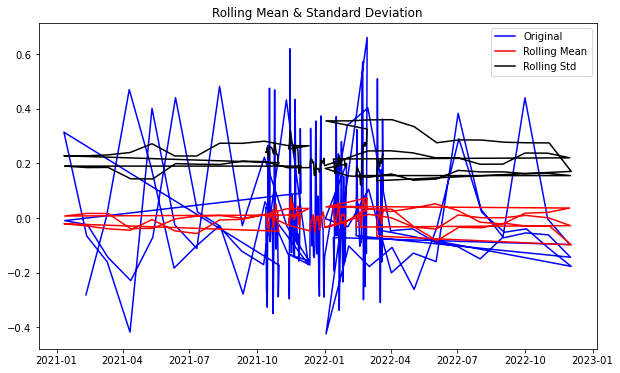

Results of Dickey Fuller Test:
Test Statistic                  -4.570746
p-value                          0.000146
Lags Used                       13.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


In [30]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


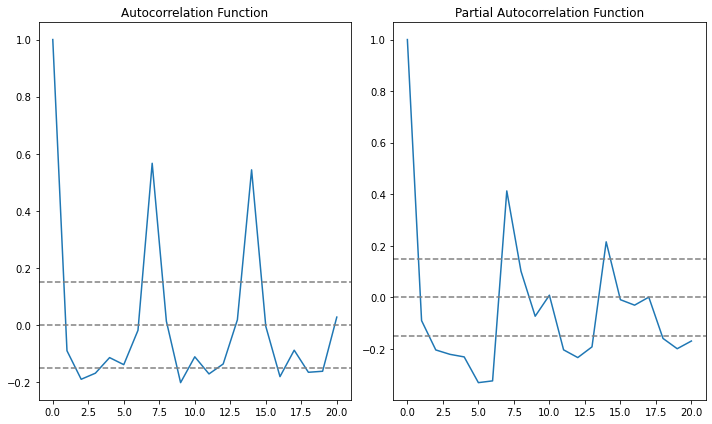

In [31]:
from statsmodels.tsa.stattools import acf, pacf
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

In [32]:
import statsmodels.api as sm

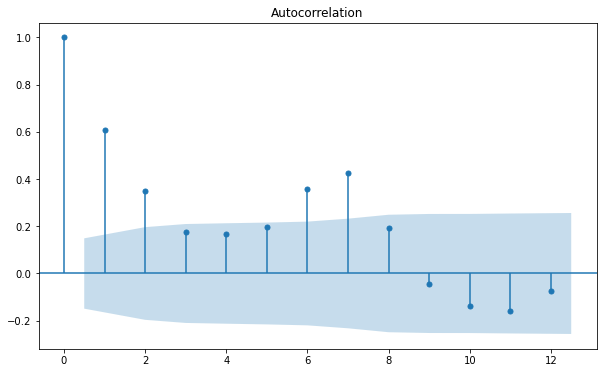

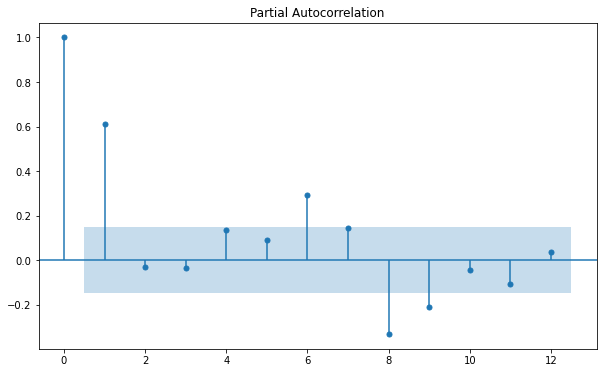

In [33]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data["Daily Visitors"],lags=12)
tsa_plots.plot_pacf(data["Daily Visitors"],lags=12)
plt.show()

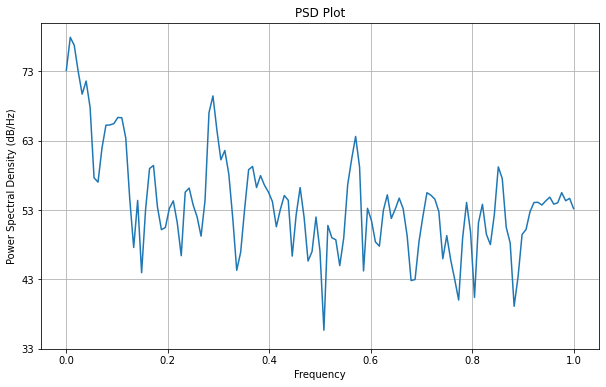

In [34]:
#Plot PSD
plt.psd(data["Daily Visitors"], detrend='linear');
plt.title("PSD Plot");

# Holt Winter’s

In [35]:
#counting the number of missing values
df = (data['Daily Visitors']).isnull()
df

Date
2021-01-10    False
2021-02-10    False
2021-03-10    False
2021-04-10    False
2021-05-10    False
              ...  
2022-03-18    False
2022-03-19    False
2022-03-20    False
2022-03-21    False
2022-03-22    False
Name: Daily Visitors, Length: 173, dtype: bool

<AxesSubplot:xlabel='Daily Visitors'>

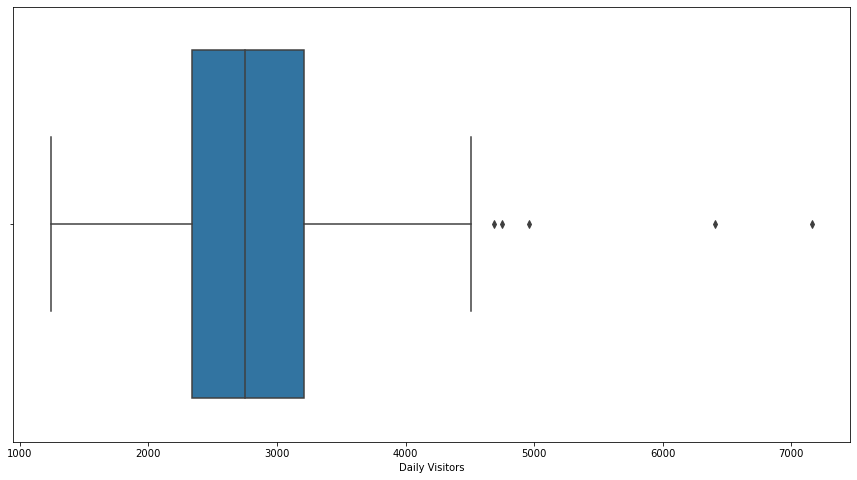

In [36]:
#Outlier detection and treatment
plt.figure(figsize=(15,8))
sns.boxplot(x= data['Daily Visitors'])

In [37]:
#calculating the z score
data['z_score'] = data['Daily Visitors'] - data['Daily Visitors'].mean()/data['Daily Visitors'].std(ddof=0)

In [38]:
from scipy import stats

In [39]:
#exclude the row with z score more than 3
data[(np.abs(stats.zscore(data['z_score'])) < 3)]

,Daily Visitors,z_score
Date,,
2021-01-10,2649,2645.290981
2021-02-10,2000,1996.290981
2021-03-10,2011,2007.290981
2021-04-10,3219,3215.290981
2021-05-10,3870,3866.290981
...,...,...
2022-03-18,2494,2490.290981
2022-03-19,2976,2972.290981
2022-03-20,2534,2530.290981


In [40]:
data.sort_index(inplace=True) # sort the data as per the index

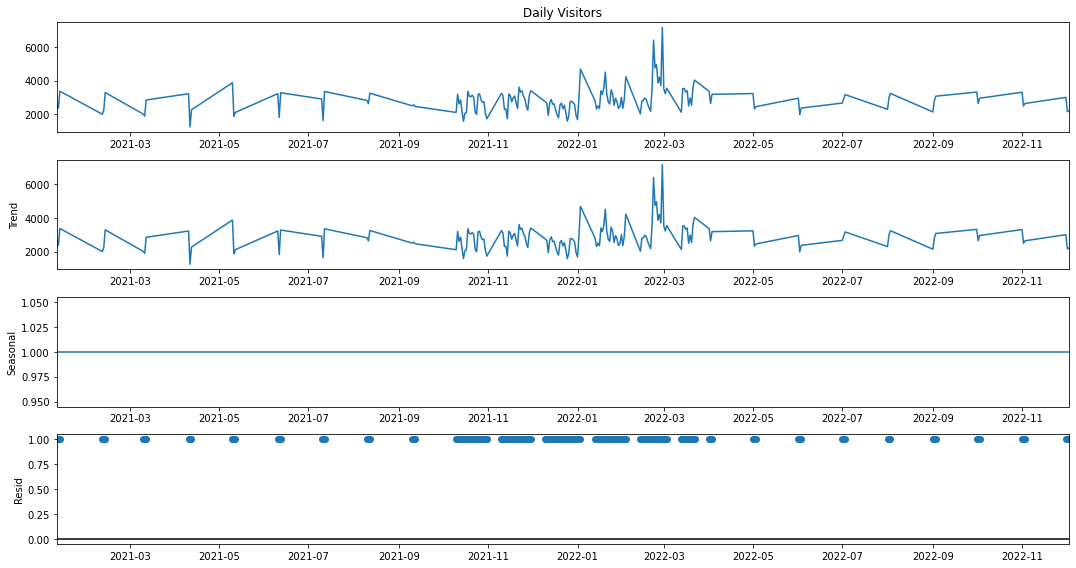

In [41]:
# Decompose the data frame to get the trend, seasonality and noise
plt.rcParams["figure.figsize"] = (15,8)
decompose_result = seasonal_decompose(data['Daily Visitors'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

In [42]:
# Set the value of Alpha and define x as the time period
x = 12
alpha = 1/(2*x)

C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing grpah'}, xlabel='Date'>

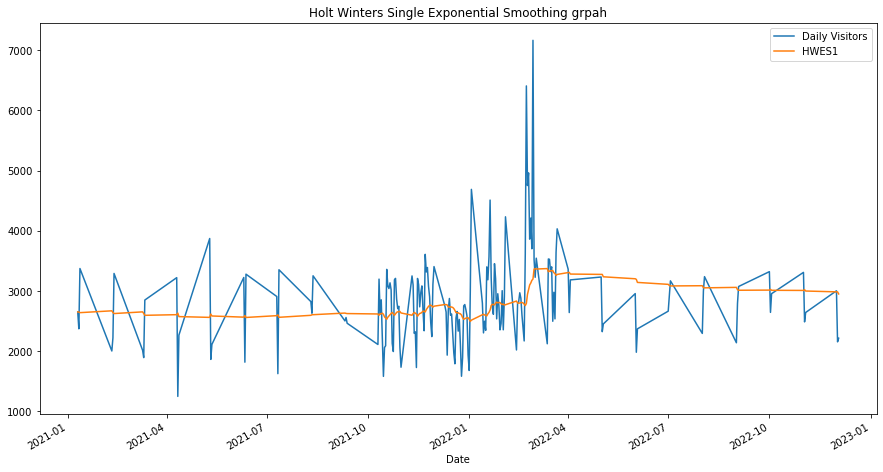

In [43]:
# Single exponential smoothing of the visitors data set
data['HWES1'] = SimpleExpSmoothing(data['Daily Visitors']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
data[['Daily Visitors','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')

C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:title={'center':'Holt Winters grapg: Additive Trend and Multiplicative Trend'}, xlabel='Date'>

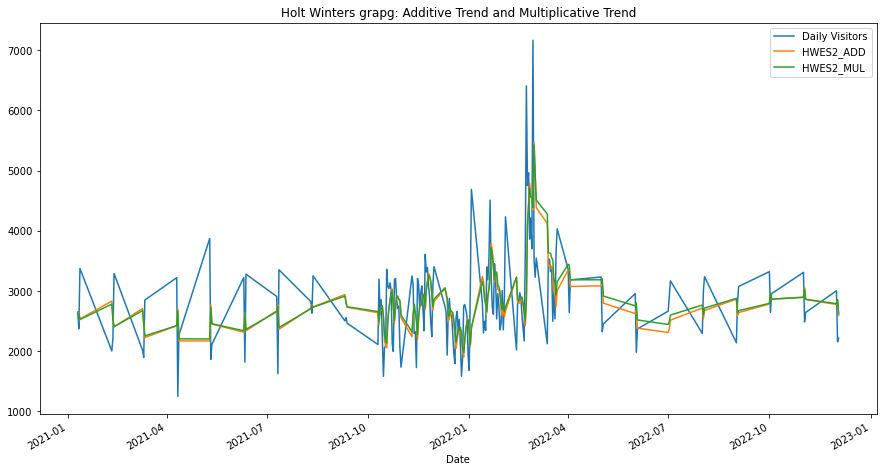

In [44]:
# Double exponential smoothing of visitors data set ( Additive and multiplicative)
data['HWES2_ADD'] = ExponentialSmoothing(data['Daily Visitors'],trend='add').fit().fittedvalues
data['HWES2_MUL'] = ExponentialSmoothing(data['Daily Visitors'],trend='mul').fit().fittedvalues
data[['Daily Visitors','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend')

C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Simran Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


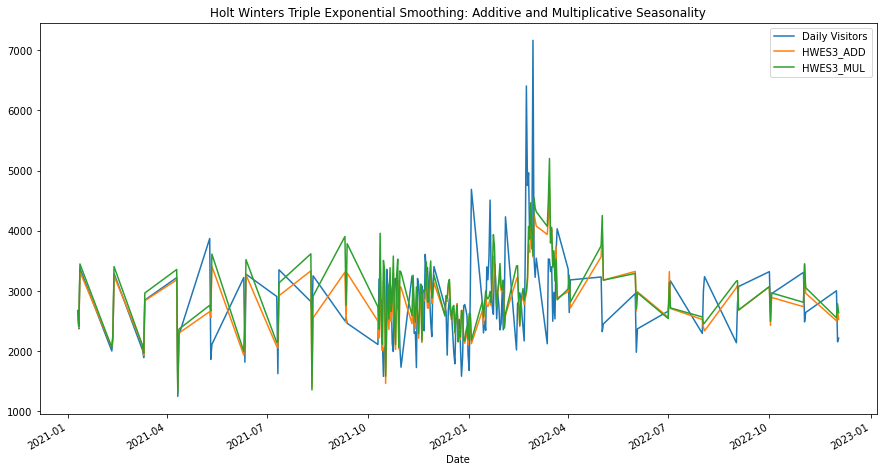

In [45]:
data['HWES3_ADD'] = ExponentialSmoothing(data['Daily Visitors'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

data['HWES3_MUL'] = ExponentialSmoothing(data['Daily Visitors'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

data[['Daily Visitors','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [46]:
# Split into train and test set
train_daily_visitors = dt[115:]
test_daily_visitors = dt[:115]

In [47]:
test_daily_visitors

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870
...,...,...
110,19-01-2022,3565
111,20-01-2022,4509
112,21-01-2022,3216
113,22-01-2022,2730


In [48]:
train_daily_visitors

,Date,Daily Visitors
115,24-01-2022,3452
116,25-01-2022,3202
117,26-01-2022,2534
118,27-01-2022,2952
119,28-01-2022,2751
120,29-01-2022,2351
121,30-01-2022,2459
122,31-01-2022,3003
123,01-02-2022,2996
124,02-02-2022,2903


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

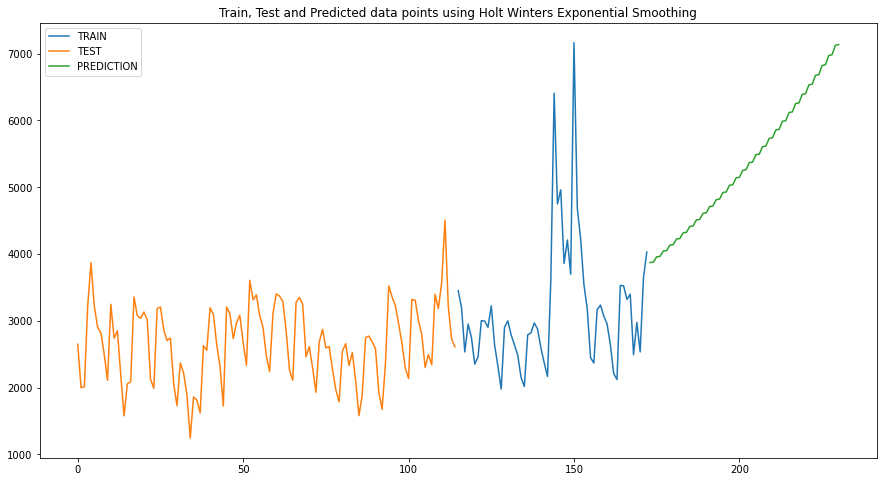

In [70]:
# Fit the model
fitted_model = ExponentialSmoothing(train_daily_visitors['Daily Visitors'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(58)
train_daily_visitors['Daily Visitors'].plot(legend=True,label='TRAIN')
test_daily_visitors['Daily Visitors'].plot(legend=True,label='TEST',figsize=(15,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

In [71]:
fitted_model.summary()

Dep. Variable:,Daily Visitors,No. Observations:,58
Model:,ExponentialSmoothing,SSE,41821224.489
Optimized:,True,AIC,794.331
Trend:,Multiplicative,BIC,806.694
Seasonal:,Multiplicative,AICC,797.270
Seasonal Periods:,2,Date:,"Sun, 10 Apr 2022"
Box-Cox:,False,Time:,13:14:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6414286,alpha,True
smoothing_trend,0.0278882,beta,True


In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(train_daily_visitors["Daily Visitors"],test_predictions))
print('RMSE = '+str(rms))

RMSE = 2509.7957166775327


# **ARIMA**

In [53]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [57]:
series = read_csv('C:\\Users\\Simran Shaikh\\OneDrive\\Desktop\\P-105\\Website Vistiors Daywise - Sheet1.csv', header=0, index_col=0, parse_dates=True)

In [58]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 163, Validation 10


**Persistence/Base Model**

In [59]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [60]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2549.000, Expected=2657.000
>Predicted=2657.000, Expected=2330.000
>Predicted=2330.000, Expected=2525.000
>Predicted=2525.000, Expected=2103.000
>Predicted=2103.000, Expected=1580.000
>Predicted=1580.000, Expected=1892.000
>Predicted=1892.000, Expected=2750.000
>Predicted=2750.000, Expected=2772.000
>Predicted=2772.000, Expected=2686.000
>Predicted=2686.000, Expected=2581.000
>Predicted=2581.000, Expected=1932.000
>Predicted=1932.000, Expected=1676.000
>Predicted=1676.000, Expected=2352.000
>Predicted=2352.000, Expected=3521.000
>Predicted=3521.000, Expected=3360.000
>Predicted=3360.000, Expected=3230.000
>Predicted=3230.000, Expected=2954.000
>Predicted=2954.000, Expected=2662.000
>Predicted=2662.000, Expected=2292.000
>Predicted=2292.000, Expected=2137.000
>Predicted=2137.000, Expected=3319.000
>Predicted=3319.000, Expected=3307.000
>Predicted=3307.000, Expected=3001.000
>Predicted=3001.000, Expected=2794.000
>Predicted=2794.000, Expected=2301.000
>Predicted=2301.000, Expe

#### ARIMA Hyperparameters

In [61]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [62]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [63]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=935.759
ARIMA(0, 0, 1) RMSE=796.907
ARIMA(0, 0, 2) RMSE=736.889
ARIMA(0, 1, 0) RMSE=778.236
ARIMA(0, 1, 1) RMSE=793.240
ARIMA(0, 1, 2) RMSE=770.198
ARIMA(0, 2, 0) RMSE=1210.756
ARIMA(0, 2, 1) RMSE=786.018
ARIMA(0, 2, 2) RMSE=804.136
ARIMA(1, 0, 0) RMSE=718.822
ARIMA(1, 0, 1) RMSE=736.179
ARIMA(1, 0, 2) RMSE=744.368
ARIMA(1, 1, 0) RMSE=779.575
ARIMA(1, 1, 1) RMSE=749.686
ARIMA(1, 1, 2) RMSE=741.959
ARIMA(1, 2, 0) RMSE=1018.346
ARIMA(2, 0, 0) RMSE=739.026
ARIMA(2, 0, 1) RMSE=741.031
ARIMA(2, 0, 2) RMSE=748.332
ARIMA(2, 1, 0) RMSE=784.555
ARIMA(2, 1, 1) RMSE=754.040
ARIMA(2, 1, 2) RMSE=801.509
ARIMA(2, 2, 0) RMSE=1003.612
Best ARIMA(1, 0, 0) RMSE=718.822


#### Build Model based on the optimized values

In [64]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [65]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

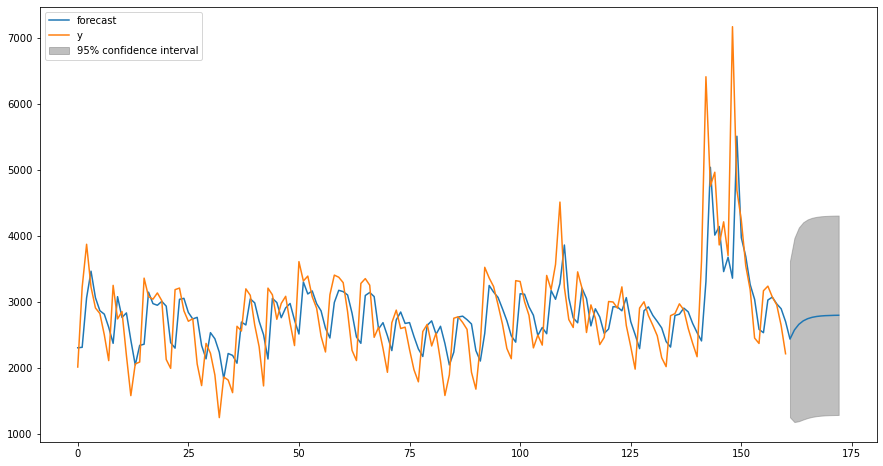

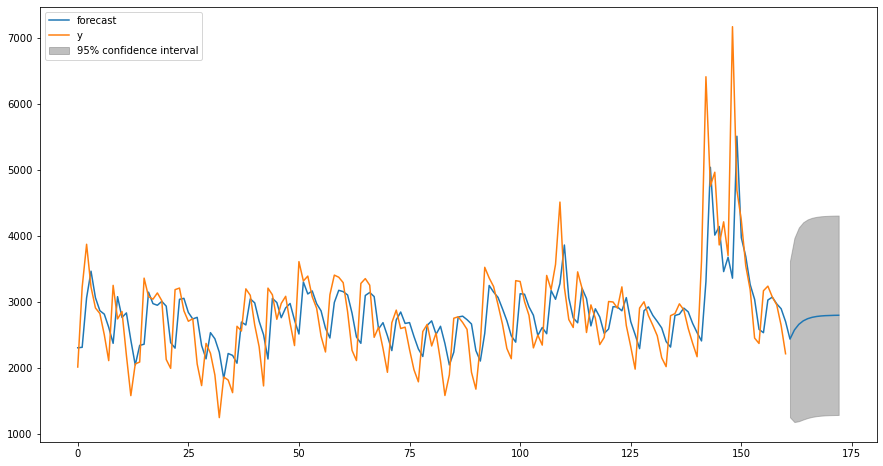

In [66]:
# fit model
model = ARIMA(X, order=(1,0,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 173)

In [67]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

707.4818856775194

#### Combine train and test data and build final model

In [75]:
# fit model
data = read_csv('C:\\Users\\Simran Shaikh\\OneDrive\\Desktop\\P-105\\Website Vistiors Daywise - Sheet1.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [76]:
model = ARIMA(X, order=(1,0,0))
model_fit = model.fit()

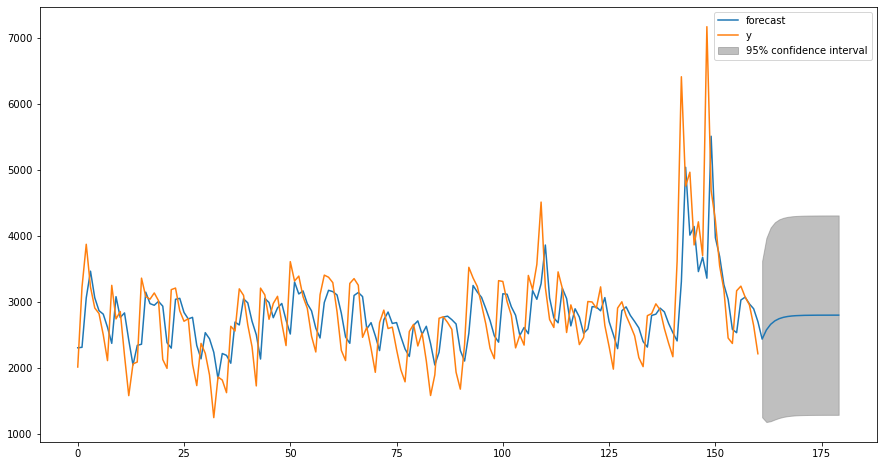

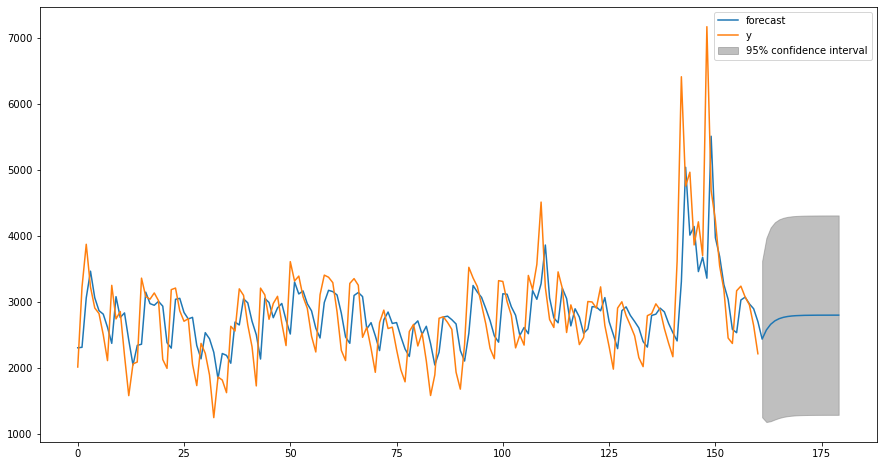

In [77]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,180)

In [78]:
forecast

array([2434.15885637, 2571.94302022, 2657.3975284 , 2710.39689178,
       2743.26739304, 2763.65386156, 2776.29766322, 2784.13941966,
       2789.00292081, 2792.01929139])